In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [22]:
df=pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
info = ["age","1: male, 0: female","chest pain type(1:typical angina, 2:atypical angina, 3:non-anginal pain, 4:asymptomatic)","resting blood pressure","serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flouroscopy","thal (3 = normal, 6 = fixed defect, 7 = reversable defect)"]


for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type(1:typical angina, 2:atypical angina, 3:non-anginal pain, 4:asymptomatic)
trestbps:		resting blood pressure
chol:		serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flouroscopy
thal:		thal (3 = normal, 6 = fixed defect, 7 = reversable defect)


## Visualization

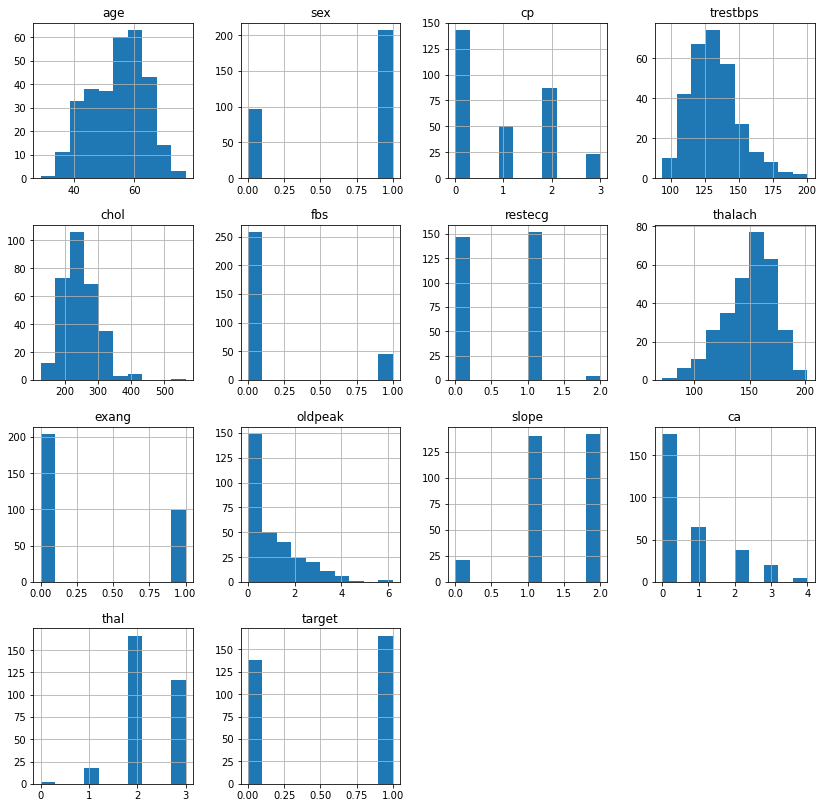

In [25]:
df.hist(figsize=(14,14))
plt.show()

## Data Preprocessing

In [3]:
dataset = pd.get_dummies(df, columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])

In [4]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [10]:
dataset[["age","trestbps","chol","thalach","oldpeak"]]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [21]:
# Feature Scaling (seperate fit and transform)
from sklearn.preprocessing import StandardScaler

standardScalar = StandardScaler()
columns_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
sc = standardScalar.fit(dataset[columns_to_scale])
dataset[columns_to_scale] = sc.transform(dataset[columns_to_scale])
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
dataset_std.std()

1.0

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

standardScalar = StandardScaler()
columns_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
dataset[columns_to_scale] = standardScalar.fit_transform(dataset[columns_to_scale])

In [24]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# seperate dependent and independent feature
y = dataset["target"]
X = dataset.drop(["target"], axis = 1)

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2,shuffle=True)

In [ ]:
print(X_test.head())

In [ ]:
y_test

## K-NearestNeighbor

In [ ]:
# Cross Validation step 
from sklearn.model_selection import cross_val_score

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X, y, cv=5)
#     score = cross_val_score(knn_classifier, X_train, y_train, cv=5)
#     score = cross_val_score(knn_classifier, X_test, y_test, cv=5)
    knn_scores.append(round(score.mean(),5))

In [ ]:
# For model.fit() approach

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    prediction_knn = knn_classifier.predict(X_test)
    test_acc = accuracy_score(prediction_knn, y_test)
    knn_scores.append(round(test_acc,4))

In [ ]:
knn_scores

In [ ]:
plt.figure(figsize=(12,7))
plt.plot([k for k in range(1,21)], knn_scores, color = "red")
# plt.plot(knn_scores, color = "red")
for i in range(1, 21):
#     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    plt.text(i, knn_scores[i-1], (knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Scores")
plt.title("K Neighbors Classifier scores for different K values")
plt.show()

In [ ]:
# Training the KNN model by fitting X_train, y_train

knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

In [ ]:
# Predicting for the testing dataset
prediction_knn = knn_classifier.predict(X_test)
testing_acc = accuracy_score(prediction_knn, y_test)
testing_acc

In [ ]:
# Predicting for the training dataset
prediction_knn = knn_classifier.predict(X_train)
training_acc = accuracy_score(prediction_knn, y_train)
training_acc

## Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

In [ ]:
# Predicting for the testing dataset
prediction_df = dt_classifier.predict(X_test)
testing_acc = accuracy_score(prediction_df, y_test)
testing_acc

In [ ]:
X_test

## Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn_classifier, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix (KNN)', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
# plt.gcf().axes[0].tick_params(colors='white')
# plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(8,8)
plt.show()

In [ ]:
matrix = plot_confusion_matrix(dt_classifier, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix (Decision Tree)', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
# plt.gcf().axes[0].tick_params(colors='white')
# plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(8,8)
plt.show()

## Predict on Custom Data

In [ ]:
custom_df = pd.read_csv('./custom_data/user_heart_custom.csv')
custom_df

In [ ]:
# Prediction using Decision Tree
decision_tree_prediction = dt_classifier.predict(custom_df)
decision_tree_prediction

In [ ]:
# Converting custom infos to Standard Scaling for KNN classifier
columns_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
custom_df[columns_to_scale] = sc.transform(custom_df[columns_to_scale])
custom_df

In [ ]:
# Prediction using KNN
knn_prediction = knn_classifier.predict(custom_df)
knn_prediction